### QSAR Model Building of Acetylcholinesterase inhibitors 

Protocol by Chanin Nantasenamat 

## Read Data

In [17]:
import pandas as pd

dataset = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

dataset 

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.679854
6152,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.562249
6153,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.118045
6154,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.259637


In [18]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6152,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6153,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6154,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
Y = dataset.iloc[:,-1]
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6151    9.679854
6152    6.562249
6153    4.118045
6154    4.259637
6155    5.267606
Name: pIC50, Length: 6156, dtype: float64

## Remove low variance features 

In [20]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)

X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,0,1,0,1,0,1,1,1,1,0,...,0,0,0,0,0,1,1,1,1,0
6152,1,1,0,1,0,1,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0
6153,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6154,0,1,0,0,0,1,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0


In [21]:
X.to_csv('descriptors_list.csv', index=False)

## Random forest Regression Model 

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)

r2 = model.score(X, Y)

r2

0.817148854883295

## Model Prediction

In [23]:
Y_pred = model.predict(X)

Y_pred

array([5.8572321 , 6.60935378, 4.9434839 , ..., 4.75026775, 5.10012806,
       5.77267624])

## Model Performance 

In [24]:
print(('Mean squeared error (MSE): %.2f'
       % mean_squared_error(Y, Y_pred)))

print('Coefficient of determination (R^2):  %.2f'
      % r2_score(Y, Y_pred))

Mean squeared error (MSE): 0.45
Coefficient of determination (R^2):  0.82


Data Visualization (Experimental vs Predicted pIC50 for training data)

Text(0.5, 0, 'Experimental pIC50')

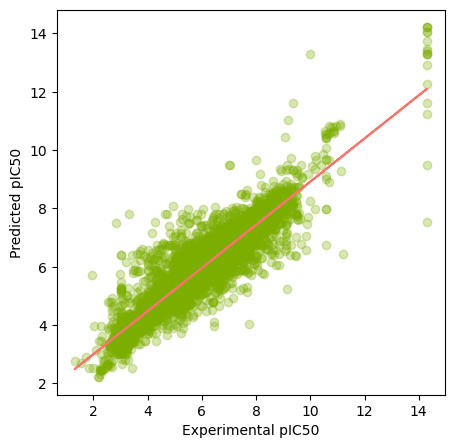

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c='#7CAE00', alpha=0.3)

# add trendline 

z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y, p(Y), "#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

## Save Model as Pickle Object

In [26]:
import pickle 

pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))